In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image  
import pydotplus
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [186]:

import math

In [52]:
data=pd.read_csv('listing_ny_2021_09_filtered.csv')
data=data.dropna()
#lst = ['host_is_superhost','accommodates','beds','price','review_scores_rating','instant_bookable']
#lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','instant_bookable','reviews_per_month']
lst = ['host_is_superhost', 'accommodates', 'beds', 'price', \
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       'review_scores_value', 'instant_bookable', 'reviews_per_month']
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,11):
        y.append(0)
    elif element in range(11,21):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [54]:
len(lst)

14

In [55]:
md=range(1,6)
ne=range(2,25)
mf=range(2,8)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 5, 'rf__max_features': 7, 'rf__n_estimators': 9}
the R2 is  0.7830153385708941


Text(0, 0.5, 'Mean decrease in impurity')

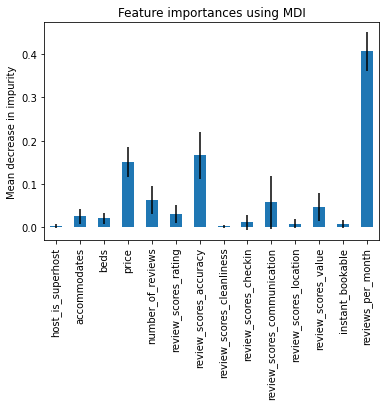

In [57]:
forest = RandomForestClassifier(max_depth= 5, max_features=7, n_estimators= 9)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [241]:
data=pd.read_csv('listing_ny_2021_09_filtered.csv')
data=data.dropna()
lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','instant_bookable','reviews_per_month']
#lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
      #'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month']
X=data.loc[:,lst]
a=data.loc[:,'availability_60']
y=[]
for element in a:
    if element in range(0,21):
        y.append(0)
    elif element in range(21,41):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)



md=range(1,6)
ne=range(2,25)
mf=range(2,6)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 5, 'rf__max_features': 5, 'rf__n_estimators': 17}
the R2 is  0.6897368749220602


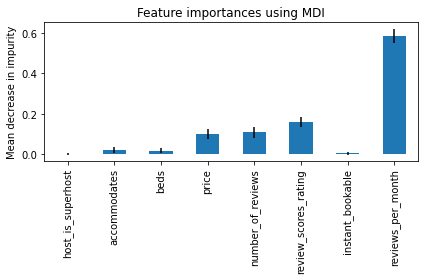

In [41]:
forest = RandomForestClassifier(max_depth= 5, max_features=5, n_estimators= 7)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [83]:
data=pd.read_csv('listing_ny_2018_09_filtered.csv')
data=data.dropna()
#lst = ['host_is_superhost','accommodates','beds','price','review_scores_rating','instant_bookable']
lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','instant_bookable','reviews_per_month']
#lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
      #'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month']
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,11):
        y.append(0)
    elif element in range(11,21):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [43]:
md=range(1,6)
ne=range(2,25)
mf=range(2,6)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 4, 'rf__max_features': 5, 'rf__n_estimators': 7}
the R2 is  0.8519206939281289


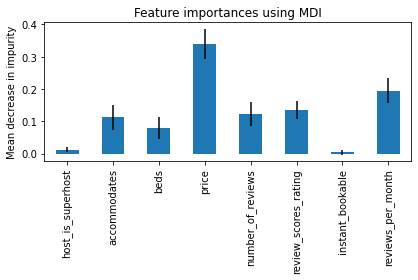

In [44]:
forest = RandomForestClassifier(max_depth= 5, max_features=5, n_estimators= 7)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [49]:
data.columns

Index(['id', 'host_is_superhost', 'zipcode', 'latitude', 'longitude',
       'room_type', 'accommodates', 'beds', 'price', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [ ]:
['host_is_superhost', 'zipcode', 'latitude', 'longitude',
       'room_type', 'accommodates', 'beds', 'price', 
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month']

In [239]:
data=pd.read_csv('WordsSelected_2021_09.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_60']
y=[]
for element in a:
    if element in range(0,6):
        y.append(0)
    elif element in range(6,15):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

KeyError: 'availability_60'

In [196]:
md=range(1,10)
mf=range(2,10)
ne=range(2,10)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 7, 'rf__max_features': 4, 'rf__n_estimators': 9}
the R2 is  0.7173940704924291


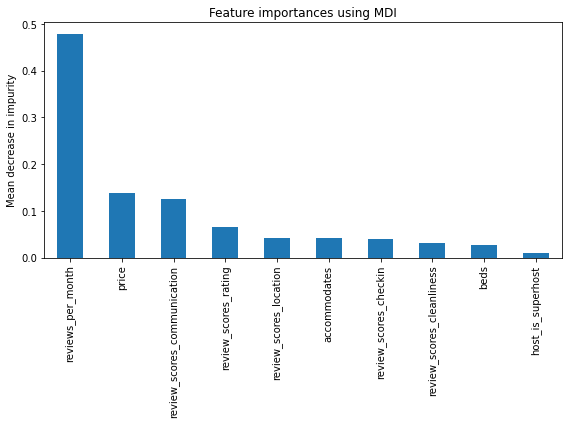

In [197]:

forest = RandomForestClassifier(max_depth= 7, max_features=4, n_estimators= 9)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:20]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [199]:
data=pd.read_csv('WordsSelected_2018_09.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,6):
        y.append(0)
    elif element in range(6,15):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

md=range(1,10)
mf=range(2,10)
ne=range(2,10)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 7, 'rf__max_features': 8, 'rf__n_estimators': 8}
the R2 is  0.7468432129077517


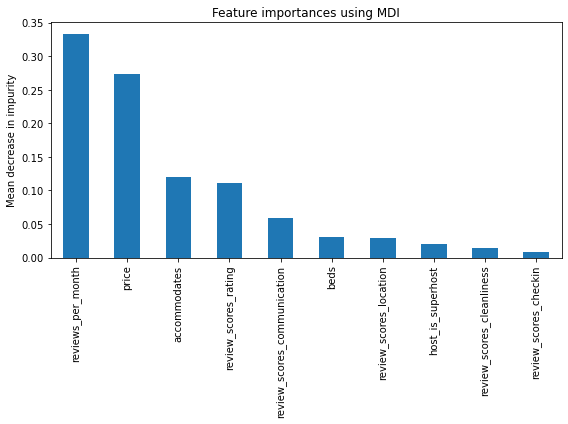

In [200]:
forest = RandomForestClassifier(max_depth= 7, max_features=8, n_estimators= 8)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:20]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#with description
#2021

In [202]:
data=pd.read_csv('WordsSelected_2021_09.csv')

In [203]:
data.columns

Index(['Unnamed: 0', 'id', 'availability_30', 'host_is_superhost', 'room_type',
       'accommodates', 'beds', 'price', 'reviews_per_month',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'description', 'textcl',
       'textbcl', 'covid', 'covid-19', 'vaccinated', 'vaccination', 'cleaned',
       'clean', 'cleaning', 'renovated', 'proof', 'disinfected', 'sanitized',
       'coronavirus', 'disinfec', 'cleaners', 'covid19', 'newest',
       'newly-renovated', 'apartment', 'bedroom', 'private', 'cozy',
       'spacious', 'beautiful', 'studio', 'home', 'welcome', 'large', 'quiet',
       'newly', 'furnished', 'modern', 'bright', 'sunny', 'apt', 'comfortable',
       'close', 'brooklyn', 'manhattan', 'queens', 'williamsburg'],
      dtype='object')

In [215]:
data=pd.read_csv('WordsSelected_2021_09.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
       '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
       '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
       '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
       '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
       '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
       '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,6):
        y.append(0)
    elif element in range(6,15):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [213]:
# md=range(1,6)
# ne=range(2,8)
# mf=range(2,6)
md=range(1,15)
mf=range(2,10)
ne=range(2,15)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 11, 'rf__max_features': 9, 'rf__n_estimators': 13}
the R2 is  0.7251558722483776


In [238]:
sum(forest.predict(X_test)==0)/len(forest.predict(X_test))

0.9806208347948089

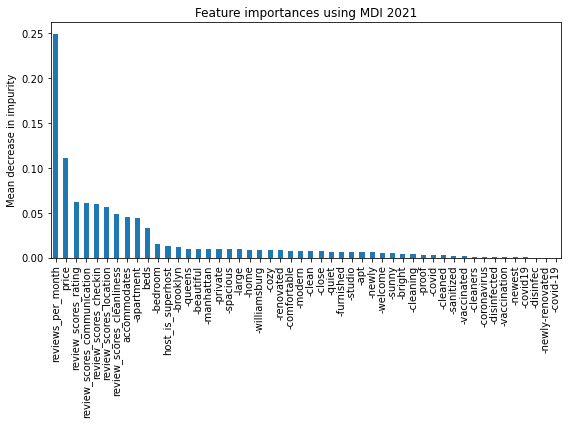

In [214]:
forest = RandomForestClassifier(max_depth= 11, max_features=9, n_estimators= 13)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:20]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2021")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#2018

In [216]:
data=pd.read_csv('WordsSelected_2018_09.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
       '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
       '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
       '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
       '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
       '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
       '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,6):
        y.append(0)
    elif element in range(6,15):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [217]:
md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 13, 'rf__max_features': 9, 'rf__n_estimators': 14}
the R2 is  0.7461417046650298


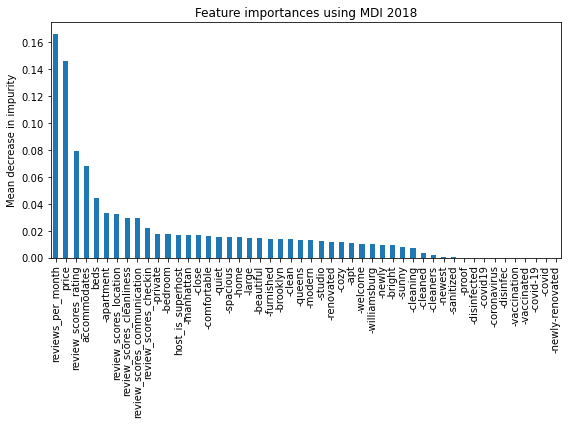

In [218]:
forest = RandomForestClassifier(max_depth= 13, max_features=9, n_estimators= 14)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2018")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

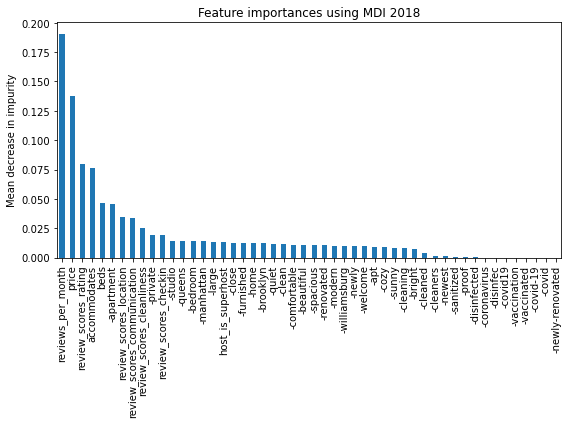

In [219]:
forest = RandomForestClassifier(max_depth= 11, max_features=9, n_estimators= 13)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2018")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#remove review 
#with description

In [164]:
data=pd.read_csv('WordsSelected_2021_09.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
       '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
       '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
       '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
       '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
       '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
       '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg']
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,6):
        y.append(0)
    elif element in range(6,15):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,10)
mf=range(2,10)
ne=range(2,10)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 9, 'rf__max_features': 7, 'rf__n_estimators': 9}
the R2 is  0.7171395851889554


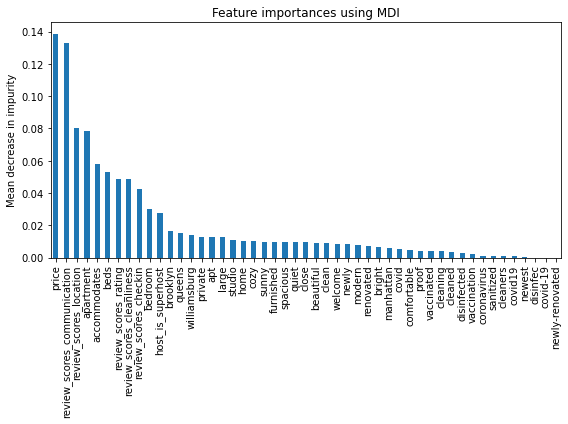

In [165]:
forest = RandomForestClassifier(max_depth= 9, max_features=6, n_estimators= 8)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:30]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [166]:
ft21 = forest_importances

In [167]:
data=pd.read_csv('WordsSelected_2018_09.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
       '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
       '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
       '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
       '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
       '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
       '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(0,6):
        y.append(0)
    elif element in range(6,15):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,10)
mf=range(2,10)
ne=range(2,10)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 9, 'rf__max_features': 9, 'rf__n_estimators': 7}
the R2 is  0.7458786390740091


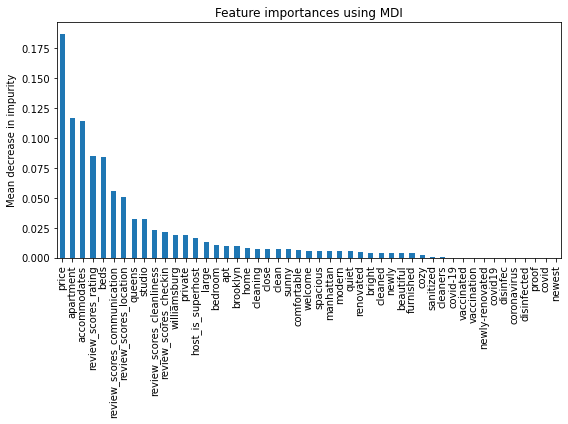

In [168]:
forest = RandomForestClassifier(max_depth= 7, max_features=9, n_estimators= 9)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [254]:
data=pd.read_csv('listing_ny_2021_09_filtered.csv')
data=data.dropna()
lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','instant_bookable','reviews_per_month']
#lst = ['host_is_superhost','accommodates','beds','price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
      #'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month']
X=data.loc[:,lst]
a=data.loc[:,'availability_60']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    elif element in range(1,30):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)



md=range(1,6)
ne=range(2,25)
mf=range(2,6)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 5, 'rf__max_features': 5, 'rf__n_estimators': 23}
the R2 is  0.5848609552313256


In [255]:
y.count(0)/len(y)

0.49513655069210627

In [258]:
data21=pd.read_csv('listing_ny_2021_09_filtered.csv')
df21 = data21[['id','availability_60']]

In [260]:
data18=pd.read_csv('listing_ny_2018_09_filtered.csv')
df18 = data18[['id','availability_60']]

In [262]:
word18=pd.read_csv('WordsSelected_2018_09.csv')
word21=pd.read_csv('WordsSelected_2021_09.csv')

In [266]:
df18.head()

,id,availability_60
0,2515,26
1,2539,60
2,2595,46
3,3330,14
4,3647,60


In [263]:
word18.head()

,Unnamed: 0,id,availability_30,host_is_superhost,room_type,accommodates,beds,price,reviews_per_month,number_of_reviews,...,-modern,-bright,-sunny,-apt,-comfortable,-close,-brooklyn,-manhattan,-queens,-williamsburg
0,0,2515,6,0,1,3,2.0,59.0,1.41,170,...,0,0,0,1,1,0,0,0,0,0
1,1,2539,30,1,1,4,3.0,149.0,0.24,8,...,0,0,0,1,0,1,0,0,0,0
2,2,2595,16,0,1,2,1.0,225.0,0.32,34,...,1,1,0,0,1,0,0,1,0,0
3,3,3330,7,0,1,2,1.0,70.0,0.31,33,...,0,0,0,0,0,0,1,0,0,1
4,4,3831,0,0,1,3,3.0,89.0,4.40,211,...,0,0,1,0,0,0,0,0,0,1


In [267]:
df181 = word18.merge(df18,how='left',left_on = 'id',right_on = 'id')

In [269]:
df211 = word21.merge(df21,how='left',left_on = 'id',right_on = 'id')

In [279]:
df181['price'].mean()

142.0414079764285

In [280]:
df211['price'].mean()

158.77989005955106

In [281]:
print(df181['availability_30'].mean())
print(df211['availability_30'].mean())

4.425681363779859
5.657886700259581


In [ ]:
#18

In [289]:
def rff(data):
    data=data.dropna()
    lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
           'review_scores_rating',\
           'review_scores_cleanliness', 'review_scores_checkin',\
           'review_scores_communication', 'review_scores_location',\
           '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
           '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
           '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
           '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
           '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
           '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
           '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
    X=data.loc[:,lst]
    a=data.loc[:,'availability_30']
    y=[]
    for element in a:
        if element in range(1):
            y.append(0)
        else:
            y.append(1)
    X=pd.get_dummies(X)
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


    md=range(1,15)
    mf=range(2,10)
    ne=range(2,15)


    pipeline = Pipeline([('rf', RandomForestClassifier())])
    parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

    grid_search.fit(X_train, y_train)
    print('the best parameter is ',grid_search.best_params_)
    print('the R2 is ',grid_search.score(X_test, y_test))
    

In [303]:
data=df181
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',''\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
       '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
       '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
       '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
       '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
       '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
       '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_60']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    elif element in range(1,30):
        y.append(1)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 11, 'rf__max_features': 9, 'rf__n_estimators': 14}
the R2 is  0.7377236057523676


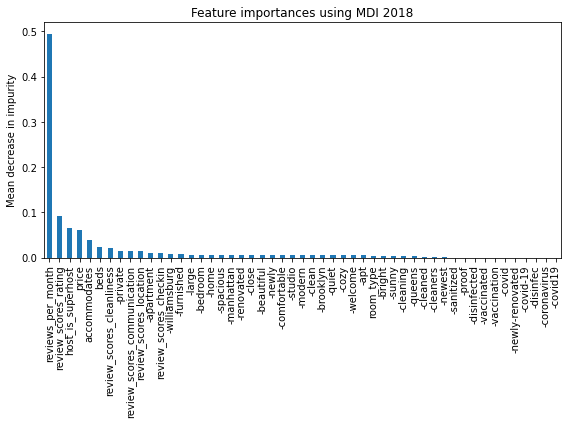

In [304]:
forest = RandomForestClassifier(max_depth= 11, max_features=9, n_estimators= 14)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2018")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [306]:
data=df211
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating','room_type',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location',\
       '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
       '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
       '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
       '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
       '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
       '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
       '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_60']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    elif element in range(1,30):
        y.append(1)
    else:
        y.append(2)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 13, 'rf__max_features': 8, 'rf__n_estimators': 13}
the R2 is  0.7157399160198499


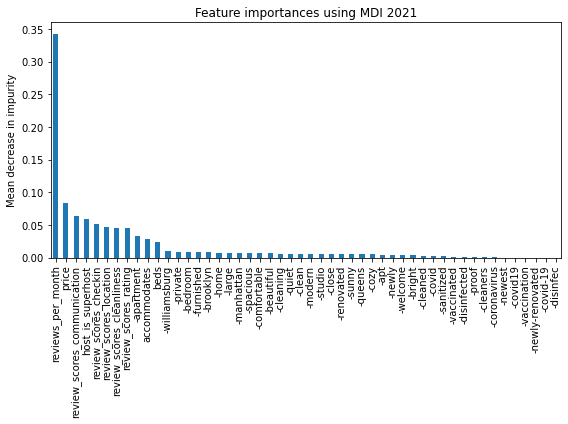

In [276]:
forest = RandomForestClassifier(max_depth= 10, max_features=9, n_estimators= 14)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2021")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [308]:
data=df211
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
           'review_scores_rating','room_type',\
           'review_scores_cleanliness', 'review_scores_checkin',\
           'review_scores_communication', 'review_scores_location',\
           '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
           '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
           '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
           '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
           '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
           '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
           '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 11, 'rf__max_features': 9, 'rf__n_estimators': 14}
the R2 is  0.7092505407812699


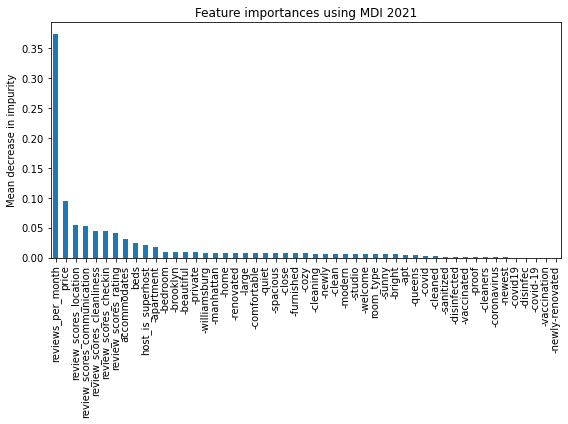

In [309]:
forest = RandomForestClassifier(max_depth= 12, max_features=8, n_estimators= 14)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2021")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [310]:
data=df181
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
           'review_scores_rating','room_type',\
           'review_scores_cleanliness', 'review_scores_checkin',\
           'review_scores_communication', 'review_scores_location',\
           '-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
           '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
           '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
           '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
           '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
           '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
           '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 8, 'rf__max_features': 7, 'rf__n_estimators': 14}
the R2 is  0.7115924237109786


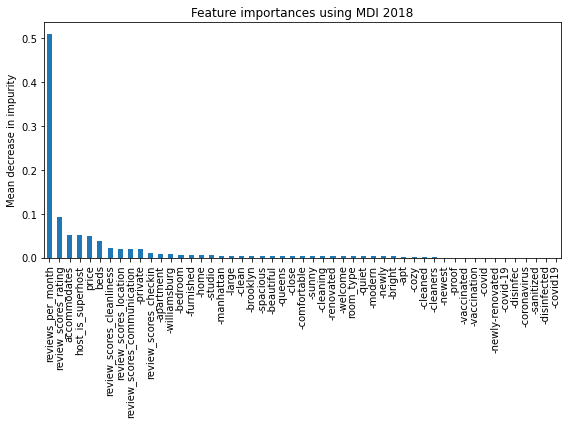

In [311]:
forest = RandomForestClassifier(max_depth= 9, max_features=7, n_estimators= 9)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2018")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [299]:
data=pd.read_csv('listing_ny_2018_09_filtered.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
md=range(1,15)
mf=range(2,10)
ne=range(2,15)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 8, 'rf__max_features': 3, 'rf__n_estimators': 11}
the R2 is  0.7091520623119136


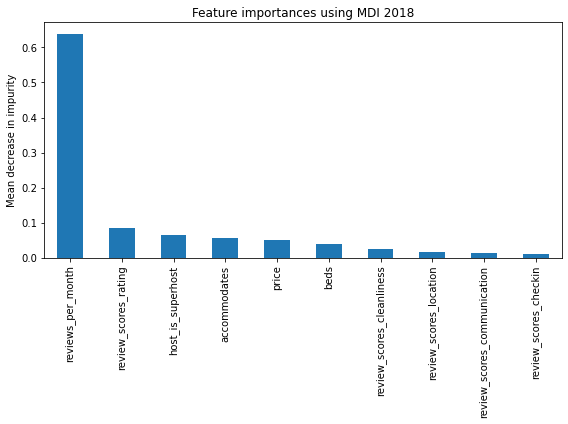

In [300]:
forest = RandomForestClassifier(max_depth= 8, max_features=3, n_estimators= 11)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2018")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [301]:
data=pd.read_csv('listing_ny_2021_09_filtered.csv')
data=data.dropna()
lst =['host_is_superhost','accommodates', 'beds', 'price', 'reviews_per_month',\
       'review_scores_rating',\
       'review_scores_cleanliness', 'review_scores_checkin',\
       'review_scores_communication', 'review_scores_location'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
md=range(1,15)
mf=range(2,10)
ne=range(2,15)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 7, 'rf__max_features': 4, 'rf__n_estimators': 13}
the R2 is  0.7195410899114603


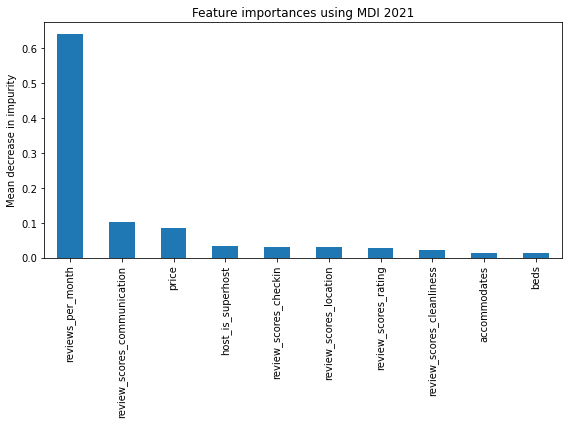

In [302]:
forest = RandomForestClassifier(max_depth= 7, max_features=4, n_estimators= 13)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2021")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [316]:
lst =['-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
           '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
           '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
           '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
           '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
           '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
           '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
len(lst)

40

In [312]:
data=df181
data=data.dropna()
lst =['-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
           '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
           '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
           '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
           '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
           '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
           '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 8, 'rf__max_features': 9, 'rf__n_estimators': 14}
the R2 is  0.5705892669238863


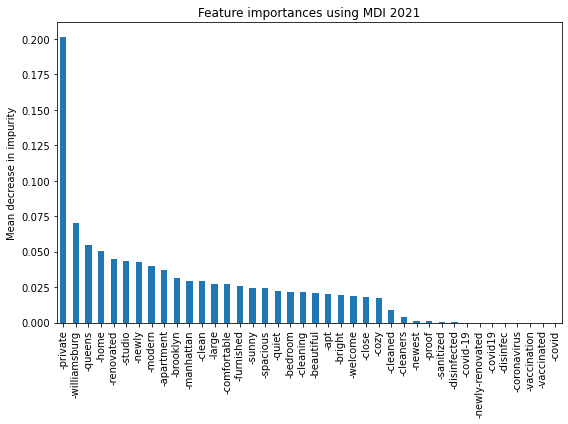

In [313]:
forest = RandomForestClassifier(max_depth= 8, max_features=9, n_estimators= 14)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2021")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [314]:
data=df211
data=data.dropna()
lst =['-covid', '-covid-19', '-vaccinated', '-vaccination', '-cleaned',\
           '-clean', '-cleaning', '-renovated', '-proof', '-disinfected', '-sanitized',\
           '-coronavirus', '-disinfec', '-cleaners', '-covid19', '-newest',\
           '-newly-renovated', '-apartment', '-bedroom', '-private', '-cozy',\
           '-spacious', '-beautiful', '-studio', '-home', '-welcome', '-large', '-quiet',\
           '-newly', '-furnished', '-modern', '-bright', '-sunny', '-apt', '-comfortable',\
           '-close', '-brooklyn', '-manhattan', '-queens', '-williamsburg'] 
X=data.loc[:,lst]
a=data.loc[:,'availability_30']
y=[]
for element in a:
    if element in range(1):
        y.append(0)
    else:
        y.append(1)
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


md=range(1,15)
mf=range(2,10)
ne=range(2,15)


pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3,refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 13, 'rf__max_features': 6, 'rf__n_estimators': 14}
the R2 is  0.6072019340883064


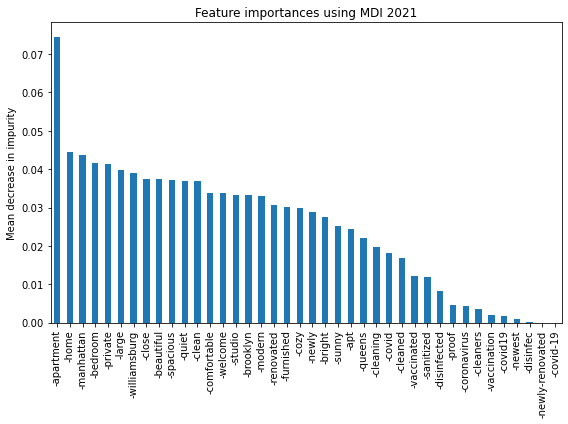

In [315]:
forest = RandomForestClassifier(max_depth= 13, max_features=6, n_estimators= 14)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns.values)
forest_importances.sort_values(ascending = False, inplace = True)
# forest_importances = forest_importances[:25]
fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI 2021")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()